# 4.2 Random Forest

## Import libraries

In [28]:
# Sirve para actualizar el modulo despues de haber cambiado algo en el codigo de los modulos importados
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
#Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from skopt.plots import plot_objective, plot_histogram, plot_evaluations
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler

In [30]:
# Modulos propios del proyecto que se encuentran en el directorio src
from src.utils.paths import data_dir
from src.visualization.word_cloud import words_cloud
from src.utils.paths import references_dir
from src.utils.metrics import display_and_plot_all_metrics, calculate_metrics


## Set up

In [31]:
# Configuracion de opciones

# Configuramos para que muestre siempre todas las columnas disponibles
pd.options.display.max_columns = None

# Cambio del tamaño de los plots para seaborn
sns.set(rc={'figure.figsize':(10,5)})

# Definimos el color para los plots
COLOR_VINO_TINTO = "#7C3030"
COLOR__VINO_BLANCO = "#ffffbf"

## Read Data

In [32]:
# Obtenemos la ruta de los csv's que vamos a utilizar
WINES_FINAL_CSV_PATH = data_dir("processed", "df_wine_complete.csv")

print(f"{WINES_FINAL_CSV_PATH}")

c:\Users\cvigo\data-projects\proyecto-final-vinos\vinos-corderhouse\data\processed\df_wine_complete.csv


In [33]:
df_wines = pd.read_csv(WINES_FINAL_CSV_PATH)

In [34]:
df_wines.sample(10)

,quality_high,body_2,body_3,body_4,body_5,style_red,style_white,region_Otras,region_Priorato,region_Rias Baixas,region_Ribera del Duero,region_Rioja,region_Toro,region_Vino de Espana,PC1,PC2,PC3,PC4,PC5,PC6,PC7
1741,1,0,0,0,1,0,1,0,0,0,1,0,0,0,-0.098270,-0.139055,0.013710,0.070619,-0.101974,-0.031651,0.078068
5314,0,0,0,1,0,0,1,0,0,0,0,1,0,0,-0.428996,0.197159,-0.154449,-0.071880,0.054034,-0.182835,-0.081680
6028,1,0,0,1,0,0,1,0,0,0,0,1,0,0,-0.023055,-0.016506,0.462943,-0.047107,-0.153108,0.347079,-0.241485
2352,1,0,0,1,0,0,1,0,0,0,0,1,0,0,-0.099113,-0.229073,0.115423,0.140107,-0.309050,0.109536,0.006845
1731,1,0,0,0,1,0,1,0,0,0,1,0,0,0,-0.022239,-0.144487,-0.138620,-0.061280,0.069550,-0.112891,-0.231831
3156,0,0,0,1,0,0,1,0,0,0,0,1,0,0,-0.063506,0.218567,0.124462,-0.027079,-0.138349,0.023830,-0.161482
4398,1,0,0,1,0,0,1,0,0,0,0,1,0,0,-0.430588,0.100672,0.111272,0.113707,-0.367247,0.194072,0.245224
1910,0,0,0,1,0,0,1,1,0,0,0,0,0,0,-0.151126,-0.293216,-0.082617,0.221696,-0.100354,-0.152156,-0.244654
2417,1,0,0,1,0,0,1,1,0,0,0,0,0,0,-0.381335,0.093894,0.215447,-0.076534,0.240919,-0.075905,-0.095075
253,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0.814633,0.566540,0.223271,-0.211670,-0.066483,-0.046402,0.046972


# Preparamos los datos

In [35]:
#Seperamos en X e y
#Elimino de mi dataset la variable a predecir
X = df_wines.drop(columns=["quality_high"])
y = df_wines.quality_high #Defino el Target

In [36]:
# Me quedo con 30% para test (validación) y 70% para train (entrenamiento)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 
X_train.shape, X_test.shape

((4246, 20), (1821, 20))

# Random Forest

In [37]:
#Creamos un random forest!
model = RandomForestClassifier(random_state=11, n_estimators=200,
                               class_weight="balanced", max_features="log2")


In [38]:
#Entrenamos el modelo
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=200, random_state=11)

In [39]:
y_test_pred = model.predict(X_test) #Prediccion en Test

In [40]:
# Calculo las metricas de evaluacion
metrics_rforest = calculate_metrics('rforest', model,X_test,y_test,y_test_pred)
metrics_rforest

,rforest
accuracy,0.71
precision,0.74
recall,0.84
f1,0.79
roc_auc,0.78
fpr,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001..."
tpr,"[0.0, 0.0025906735751295338, 0.006908462867012..."
thresholds,"[2.0, 1.0, 0.995, 0.99, 0.985, 0.98, 0.975, 0...."


# Metricas: 

### Metricas calculadas

,recall,f1,roc_auc,precision,accuracy
rforest,0.84,0.79,0.78,0.74,0.71


### Grafico de confusion matrix: 

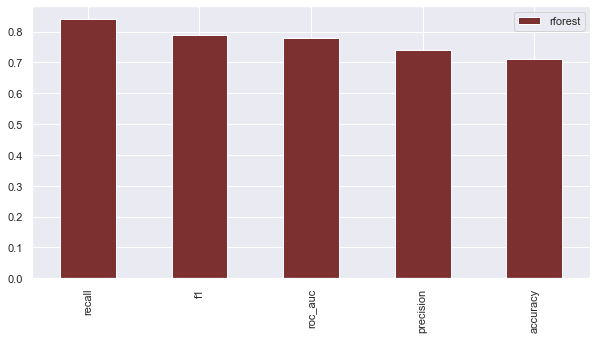

<Figure size 720x720 with 0 Axes>

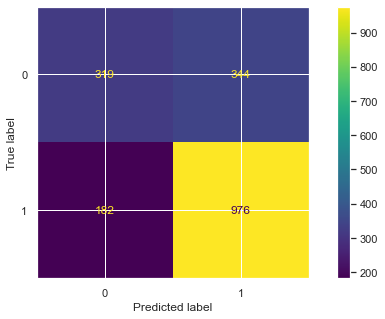

### Grafico de roc: 

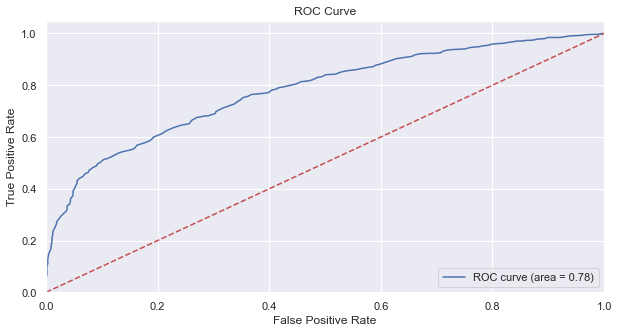

In [41]:
display_and_plot_all_metrics('rforest', model,X_test,y_test,y_test_pred)

# Hypertuning de Parámetros

En las metricas vamos a priorizar la metrica de precision ya que queremos reducir los falsos positivos porque eso implica que lso vinos de baja calidad sean clasificados como de baja calidad, y cuando se exporten puede generar malestar en los clientes y baja fidelidad.

In [42]:
# Hyperparametros

hyperparameters = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
model = BayesSearchCV(RandomForestClassifier(),
                      hyperparameters,
                      scoring='precision', 
                      n_points= 5,
                      n_iter= 30,
                      cv= 5,
                      verbose = 2,
                      n_jobs=6,
                      random_state= 88)


In [43]:
model.fit(X_train, y_train)
clf = model.best_estimator_
y_test_pred = pd.Series(clf.predict(X_test), index=X_test.index)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


c:\Users\cvigo\.conda\envs\vinos_coderhouse\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\cvigo\.conda\envs\vinos_coderhouse\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 5 candidates, totalling 25 fits


c:\Users\cvigo\.conda\envs\vinos_coderhouse\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 5 candidates, totalling 25 fits


c:\Users\cvigo\.conda\envs\vinos_coderhouse\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [44]:
# Calculo las metricas de evaluacion
metrics_rforest_tuning = calculate_metrics('rforest_tuning', clf,X_test,y_test,y_test_pred)
metrics_rforest_tuning

,rforest_tuning
accuracy,0.72
precision,0.74
recall,0.85
f1,0.79
roc_auc,0.78
fpr,"[0.0, 0.0, 0.0, 0.0015082956259426848, 0.00150..."
tpr,"[0.0, 0.0008635578583765112, 0.069084628670120..."
thresholds,"[1.9895328543642605, 0.9895328543642605, 0.945..."


# Metricas: 

### Metricas calculadas

,recall,f1,roc_auc,precision,accuracy
rforest_tuning,0.85,0.79,0.78,0.74,0.72


### Grafico de confusion matrix: 

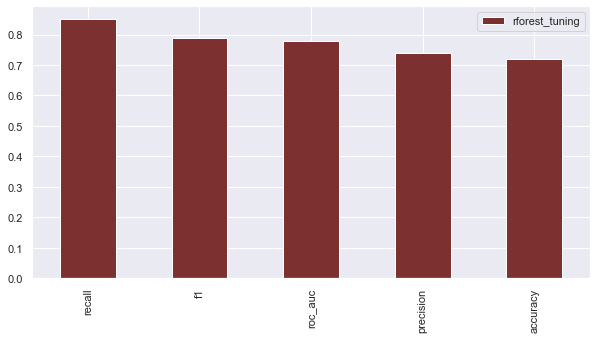

<Figure size 720x720 with 0 Axes>

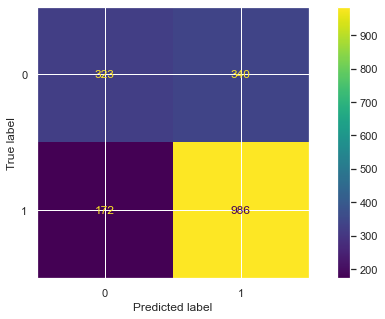

### Grafico de roc: 

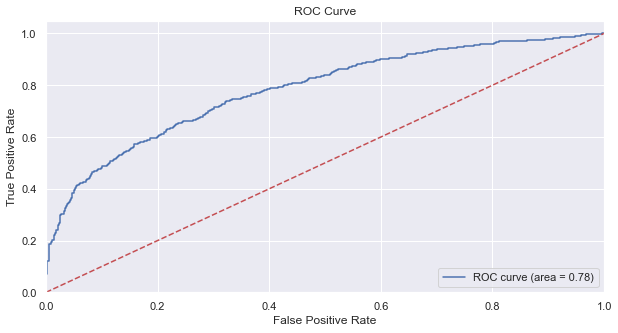

In [45]:
display_and_plot_all_metrics('rforest_tuning',clf,X_test,y_test,y_test_pred)

## Oversampling

Como estamos trabajando con una clase desbalanceada, vamos a hacer un over sampling para mitigar el problema.

In [46]:
X_resampled, y_resampled = RandomOverSampler().fit_resample(X_train, y_train)

In [47]:
model = BayesSearchCV(RandomForestClassifier(),
                      hyperparameters,
                      scoring='precision',
                      n_points= 5,
                      n_iter= 30,
                      cv= 5,
                      verbose = 2,
                      n_jobs=6,
                      random_state= 88)


In [48]:
model.fit(X_resampled, y_resampled)
clf = model.best_estimator_
y_test_pred = pd.Series(clf.predict(X_test), index=X_test.index)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


c:\Users\cvigo\.conda\envs\vinos_coderhouse\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 5 candidates, totalling 25 fits


c:\Users\cvigo\.conda\envs\vinos_coderhouse\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\cvigo\.conda\envs\vinos_coderhouse\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\cvigo\.conda\envs\vinos_coderhouse\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [49]:
# Calculo las metricas de evaluacion
metrics_rforest_tuning_oversampling = calculate_metrics('rforest_tuning_oversampling', clf,X_test,y_test,y_test_pred)
metrics_rforest_tuning_oversampling

,rforest_tuning_oversampling
accuracy,0.71
precision,0.78
recall,0.74
f1,0.76
roc_auc,0.78
fpr,"[0.0, 0.0, 0.0, 0.0015082956259426848, 0.00150..."
tpr,"[0.0, 0.0008635578583765112, 0.138169257340241..."
thresholds,"[1.9822530523096713, 0.9822530523096713, 0.881..."


# Metricas: 

### Metricas calculadas

,precision,roc_auc,f1,recall,accuracy
tree_tuning_oversampling,0.78,0.78,0.76,0.74,0.71


### Grafico de confusion matrix: 

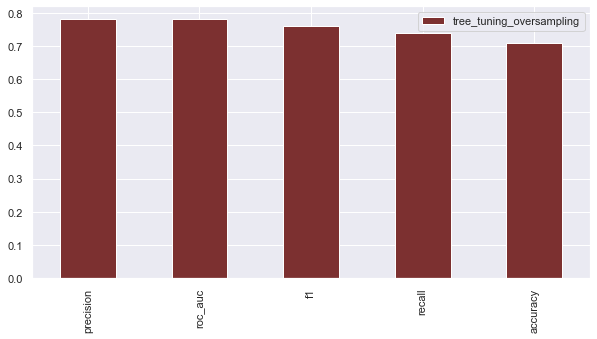

<Figure size 720x720 with 0 Axes>

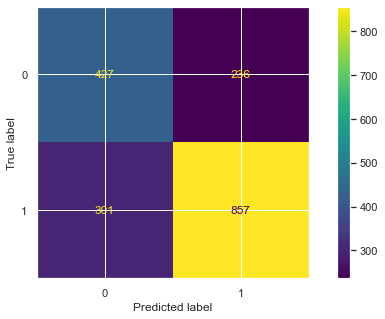

### Grafico de roc: 

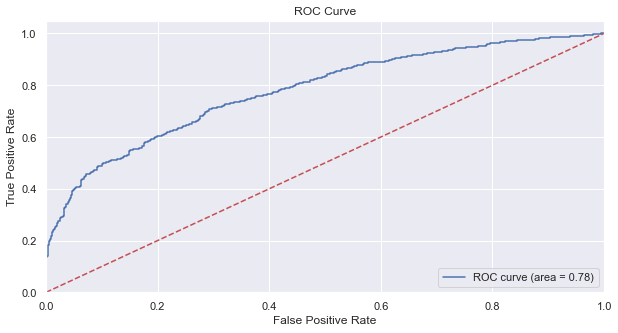

In [50]:
display_and_plot_all_metrics('tree_tuning_oversampling', clf,X_test,y_test,y_test_pred)

In [51]:
#Obtenemos los mejores parametros para el modelo
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 80,
 'max_features': 3,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [52]:
BASIC_METRICS = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

<AxesSubplot:>

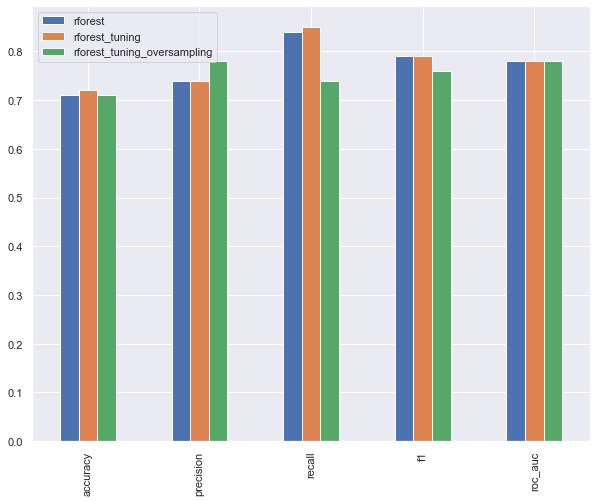

In [53]:
# Comparamos las metricas

pd.concat([metrics_rforest, metrics_rforest_tuning, metrics_rforest_tuning_oversampling], axis=1).loc[BASIC_METRICS,:].plot(kind='bar', figsize=(10,8))


In [55]:
# Guardamos las metricas en un csv
pd.concat([metrics_rforest, metrics_rforest_tuning, metrics_rforest_tuning_oversampling], axis=1).T.to_csv(data_dir("processed", "metrics_rforest.csv"), index_label= 'algorithm')